# Import Librarry

In [60]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Import Data

Dataset 'Combined_Dataset_2.csv' merupakan gabungan dari Dataset 1 dan 2 menggunakan *feature engineering*. Kedua dataset didapat dari *“Diabetes Datasets”* oleh Joseph, Lionel Prakasah; Joseph, Erica Angelic; Prasad, Ramendra (2022).

In [61]:
df = pd.read_csv('D:\Tournamen Data Nasional\MAHASISWA_RnD INTEL_V1\TSDN_MAHASISWA_RnD-Intel_V1\Sources\Data\Results_Feature_Engineering.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Gender,Polyuria,...,GenitalThrush,VisualBlurring,Itching,Irritability,DelayedHealing,PartialParesis,MuscleStiffness,Alopecia,Obesity,Class
0,6,148,72,35,0,33.6,0.627,50,Female,Yes,...,No,No,No,No,Yes,Yes,No,No,No,Positive
1,6,148,72,35,0,33.6,0.627,50,Female,No,...,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
2,6,148,72,35,0,33.6,0.627,50,Female,Yes,...,No,Yes,No,No,No,Yes,No,No,No,Positive
3,6,148,72,35,0,33.6,0.627,50,Female,No,...,No,Yes,No,No,Yes,No,No,No,No,Positive
4,6,148,72,35,0,33.6,0.627,50,Female,Yes,...,No,Yes,No,No,No,Yes,No,No,Yes,Positive


# Deskripsi Data

In [62]:
list(df)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BodyMassIndex',
 'DiabetesPedigreeFunction',
 'Age',
 'Gender',
 'Polyuria',
 'Polydipsia',
 'SuddenWeightLoss',
 'Weakness',
 'Polyphagia',
 'GenitalThrush',
 'VisualBlurring',
 'Itching',
 'Irritability',
 'DelayedHealing',
 'PartialParesis',
 'MuscleStiffness',
 'Alopecia',
 'Obesity',
 'Class']

In [63]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BodyMassIndex               float64
DiabetesPedigreeFunction    float64
Age                           int64
Gender                       object
Polyuria                     object
Polydipsia                   object
SuddenWeightLoss             object
Weakness                     object
Polyphagia                   object
GenitalThrush                object
VisualBlurring               object
Itching                      object
Irritability                 object
DelayedHealing               object
PartialParesis               object
MuscleStiffness              object
Alopecia                     object
Obesity                      object
Class                        object
dtype: object

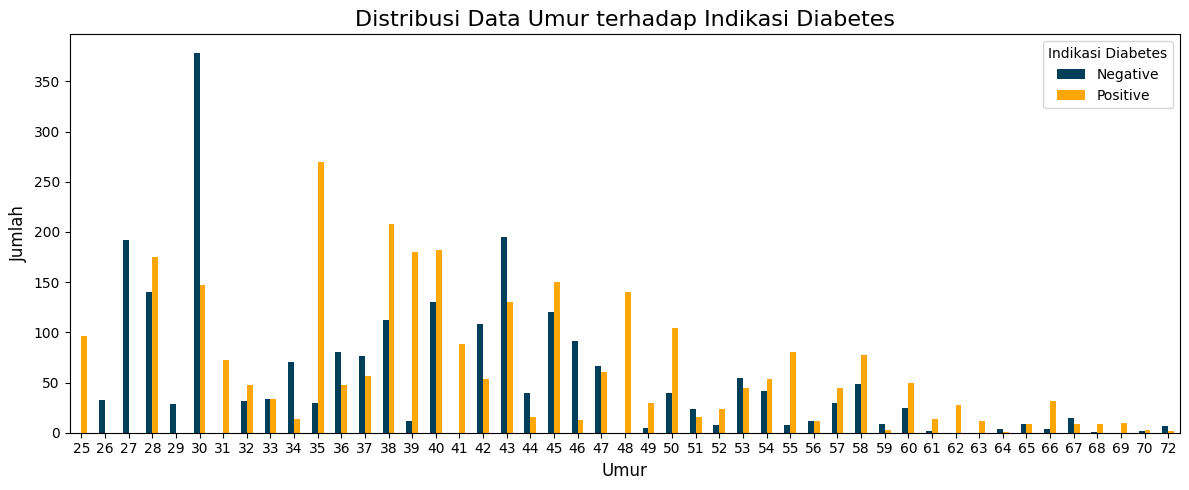

In [64]:
age_class_counts = df.groupby(['Age', 'Class'])['Class'].count().unstack()

ax = age_class_counts.plot(kind='bar', figsize=(12, 5), color=['#003f5a', '#ffa609'])

plt.title('Distribusi Data Umur terhadap Indikasi Diabetes', fontsize=16)
plt.xlabel('Umur', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Indikasi Diabetes', labels=['Negative', 'Positive'])
plt.tight_layout()
plt.show()

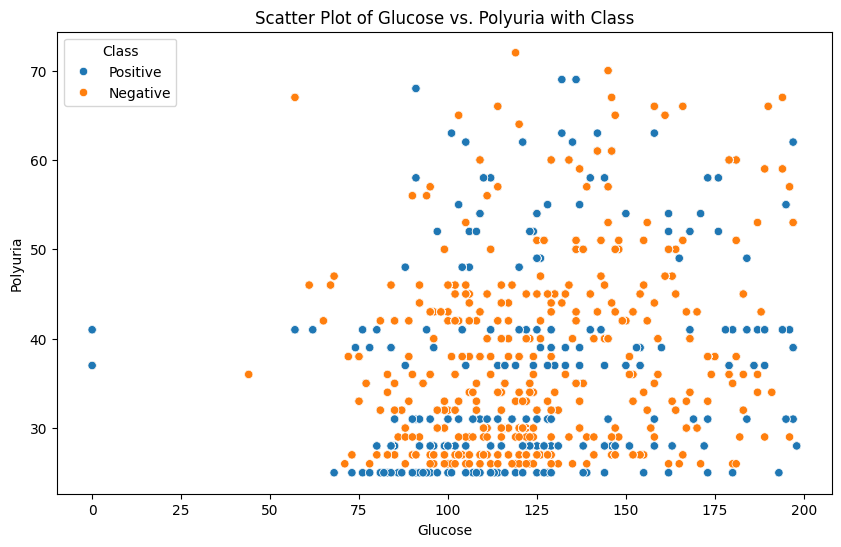

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='Age', hue='Class', data=df)
plt.title('Scatter Plot of Glucose vs. Polyuria with Class')
plt.xlabel('Glucose')
plt.ylabel('Polyuria')
plt.show()

# EDA

## Label Encoder

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Polyuria'] = le.fit_transform(df['Polyuria'])
df['Polydipsia'] = le.fit_transform(df['Polydipsia'])
df['SuddenWeightLoss'] = le.fit_transform(df['SuddenWeightLoss'])
df['Weakness'] = le.fit_transform(df['Weakness'])
df['Polyphagia'] = le.fit_transform(df['Polyphagia'])
df['GenitalThrush'] = le.fit_transform(df['GenitalThrush'])
df['VisualBlurring'] = le.fit_transform(df['VisualBlurring'])
df['Itching'] = le.fit_transform(df['Itching'])
df['Irritability'] = le.fit_transform(df['Irritability'])
df['DelayedHealing'] = le.fit_transform(df['DelayedHealing'])
df['PartialParesis'] = le.fit_transform(df['PartialParesis'])
df['MuscleStiffness'] = le.fit_transform(df['MuscleStiffness'])
df['Alopecia'] = le.fit_transform(df['Alopecia'])
df['Obesity'] = le.fit_transform(df['Obesity'])
df['Class'] = le.fit_transform(df['Class'])

## Missing Value Checking & Handling

In [67]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BodyMassIndex               0
DiabetesPedigreeFunction    0
Age                         0
Gender                      0
Polyuria                    0
Polydipsia                  0
SuddenWeightLoss            0
Weakness                    0
Polyphagia                  0
GenitalThrush               0
VisualBlurring              0
Itching                     0
Irritability                0
DelayedHealing              0
PartialParesis              0
MuscleStiffness             0
Alopecia                    0
Obesity                     0
Class                       0
dtype: int64


<Axes: >

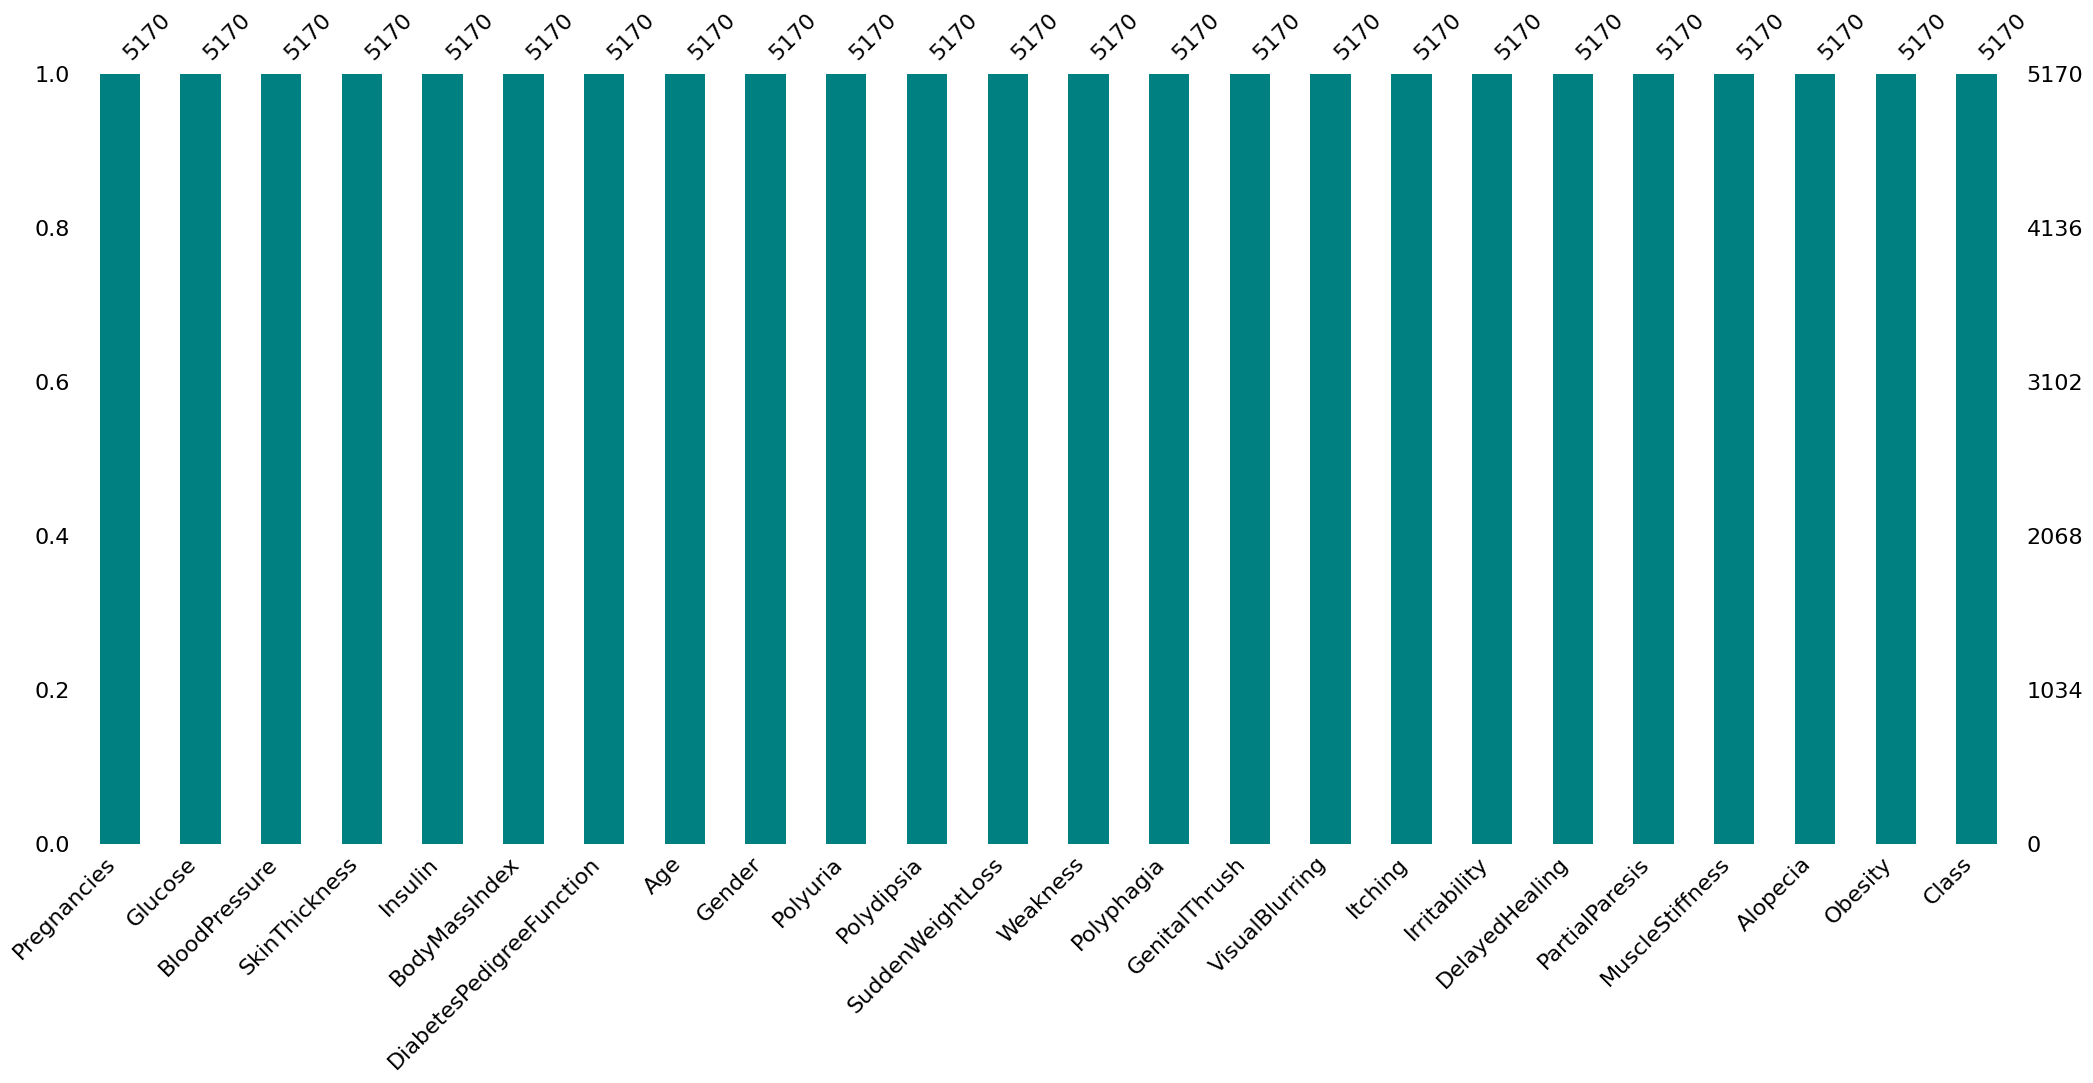

In [68]:
#Missing Value Checking Menggunakan Library Missingno
import missingno as msno
msno.bar(df, color='teal')

Berdasarkan pengecekan, dari dataset 'Combined_Dataset_2.csv' **tidak** ditemukan adanya missing value.

## Mencari Nilai Mean, Median, dan Standard Deviasi

Menghitung parameter statistik data; seperti rata-rata (mean), median, variasi, dan standar deviasi (std) pada setiap features data.

In [69]:
#Numerical Variable
data_num = [i for i in df.columns if df[i].dtype != 'object']

In [70]:
df[data_num].dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BodyMassIndex               float64
DiabetesPedigreeFunction    float64
Age                           int64
Gender                        int32
Polyuria                      int32
Polydipsia                    int32
SuddenWeightLoss              int32
Weakness                      int32
Polyphagia                    int32
GenitalThrush                 int32
VisualBlurring                int32
Itching                       int32
Irritability                  int32
DelayedHealing                int32
PartialParesis                int32
MuscleStiffness               int32
Alopecia                      int32
Obesity                       int32
Class                         int32
dtype: object

In [71]:
mean = df[data_num].mean()
var = df[data_num].var()
std = df[data_num].std()
median = df[data_num].median()


print(f'MEAN OF ALL VALUES\n\n{mean}\n\n\nVARIANCE OF ALL VALUES\n\n{var}\n\n\nSTANDARD DEVIATION OF ALL VALUES\n\n{std}\n\n\nMEDIAN OF ALL VALUES\n\n{median}')

MEAN OF ALL VALUES

Pregnancies                   5.556673
Glucose                     126.973501
BloodPressure                73.169632
SkinThickness                20.162089
Insulin                      76.445455
BodyMassIndex                32.726712
DiabetesPedigreeFunction      0.465742
Age                          40.564217
Gender                        0.638491
Polyuria                      0.393037
Polydipsia                    0.365184
SuddenWeightLoss              0.359188
Weakness                      0.487234
Polyphagia                    0.360542
GenitalThrush                 0.202708
VisualBlurring                0.338685
Itching                       0.379304
Irritability                  0.184913
DelayedHealing                0.356867
PartialParesis                0.354739
MuscleStiffness               0.293230
Alopecia                      0.260542
Obesity                       0.133269
Class                         0.551451
dtype: float64


VARIANCE OF ALL VALUES

Pre

In [72]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Gender,Polyuria,...,GenitalThrush,VisualBlurring,Itching,Irritability,DelayedHealing,PartialParesis,MuscleStiffness,Alopecia,Obesity,Class
0,6,148,72,35,0,33.6,0.627,50,0,1,...,0,0,0,0,1,1,0,0,0,1
1,6,148,72,35,0,33.6,0.627,50,0,0,...,0,1,1,1,1,1,1,0,0,1
2,6,148,72,35,0,33.6,0.627,50,0,1,...,0,1,0,0,0,1,0,0,0,1
3,6,148,72,35,0,33.6,0.627,50,0,0,...,0,1,0,0,1,0,0,0,0,1
4,6,148,72,35,0,33.6,0.627,50,0,1,...,0,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5165,8,91,82,0,0,35.6,0.587,68,0,1,...,0,1,1,0,1,1,0,0,0,1
5166,8,91,82,0,0,35.6,0.587,68,0,1,...,0,1,1,0,1,1,0,0,0,1
5167,8,91,82,0,0,35.6,0.587,68,1,1,...,0,1,1,1,0,1,0,0,0,1
5168,8,91,82,0,0,35.6,0.587,68,0,1,...,0,1,1,0,1,1,0,0,0,1


## Mencari Duplikat Data

In [73]:
df.duplicated().sum()

2772

Berdasarkan pengecekan, dari dataset 'Combined_Dataset_2.csv' ditemukan adanya nilai yang duplikat. Sehingga pada code selanjutnya, *handling duplicate data* dilakukan dengan *dropping duplicate data*.

In [74]:
df.drop_duplicates(inplace=True)
print("Jumlah data duplikat setelah dihapus:", df.duplicated().sum())

Jumlah data duplikat setelah dihapus: 0


In [75]:
df.shape

(2398, 24)

## Korelasi Data

Mencari value korelasi antar feature yang dimiliki dataframe.

In [76]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Gender,Polyuria,...,GenitalThrush,VisualBlurring,Itching,Irritability,DelayedHealing,PartialParesis,MuscleStiffness,Alopecia,Obesity,Class
Pregnancies,1.000000,0.056098,0.088652,0.024715,-0.036138,0.020616,-0.066253,0.308886,-0.010376,0.086375,...,0.069512,0.002333,0.099894,0.071140,0.074948,0.059286,0.092976,-0.023560,0.078468,0.051389
Glucose,0.056098,1.000000,0.074279,0.040247,0.317621,0.128944,0.058192,0.221742,0.003542,0.017553,...,0.001116,0.049471,0.049742,0.029961,0.038713,0.068930,0.059480,-0.003177,0.053005,0.009074
BloodPressure,0.088652,0.074279,1.000000,0.152496,0.058268,0.181632,-0.008039,0.243494,0.023741,-0.004695,...,0.022917,0.023638,0.058289,0.038944,0.040339,0.059208,0.038637,0.009550,0.015253,0.003331
SkinThickness,0.024715,0.040247,0.152496,1.000000,0.465291,0.364537,0.182715,-0.140940,-0.042566,-0.012635,...,-0.011092,-0.006891,-0.012784,-0.026214,-0.035124,-0.004506,-0.035981,-0.024648,-0.022160,0.000984
Insulin,-0.036138,0.317621,0.058268,0.465291,1.000000,0.162232,0.159181,-0.012125,-0.016277,-0.027807,...,-0.031628,0.010795,-0.044134,-0.032841,-0.023697,0.003461,0.027245,0.004453,0.006982,-0.037696
BodyMassIndex,0.020616,0.128944,0.181632,0.364537,0.162232,1.000000,0.145556,-0.092426,0.044165,-0.040099,...,0.026506,-0.057972,-0.013669,-0.003664,-0.060625,-0.037216,-0.025099,0.000866,-0.010502,-0.021482
DiabetesPedigreeFunction,-0.066253,0.058192,-0.008039,0.182715,0.159181,0.145556,1.000000,-0.009322,-0.010231,-0.009041,...,0.031285,0.042248,0.003581,0.025539,-0.001905,-0.012510,-0.019144,0.045966,-0.002638,0.006005
Age,0.308886,0.221742,0.243494,-0.140940,-0.012125,-0.092426,-0.009322,1.000000,0.101774,0.143741,...,0.082196,0.233698,0.234625,0.178329,0.229499,0.228222,0.260823,0.182362,0.237014,0.109640
Gender,-0.010376,0.003542,0.023741,-0.042566,-0.016277,0.044165,-0.010231,0.101774,1.000000,-0.191997,...,0.333340,-0.280780,-0.026202,-0.011999,-0.067311,-0.435596,-0.167439,0.299568,0.048049,-0.326409
Polyuria,0.086375,0.017553,-0.004695,-0.012635,-0.027807,-0.040099,-0.009041,0.143741,-0.191997,1.000000,...,0.191223,0.231939,0.207971,0.216401,0.302636,0.366237,0.290201,-0.035421,0.089349,0.658216


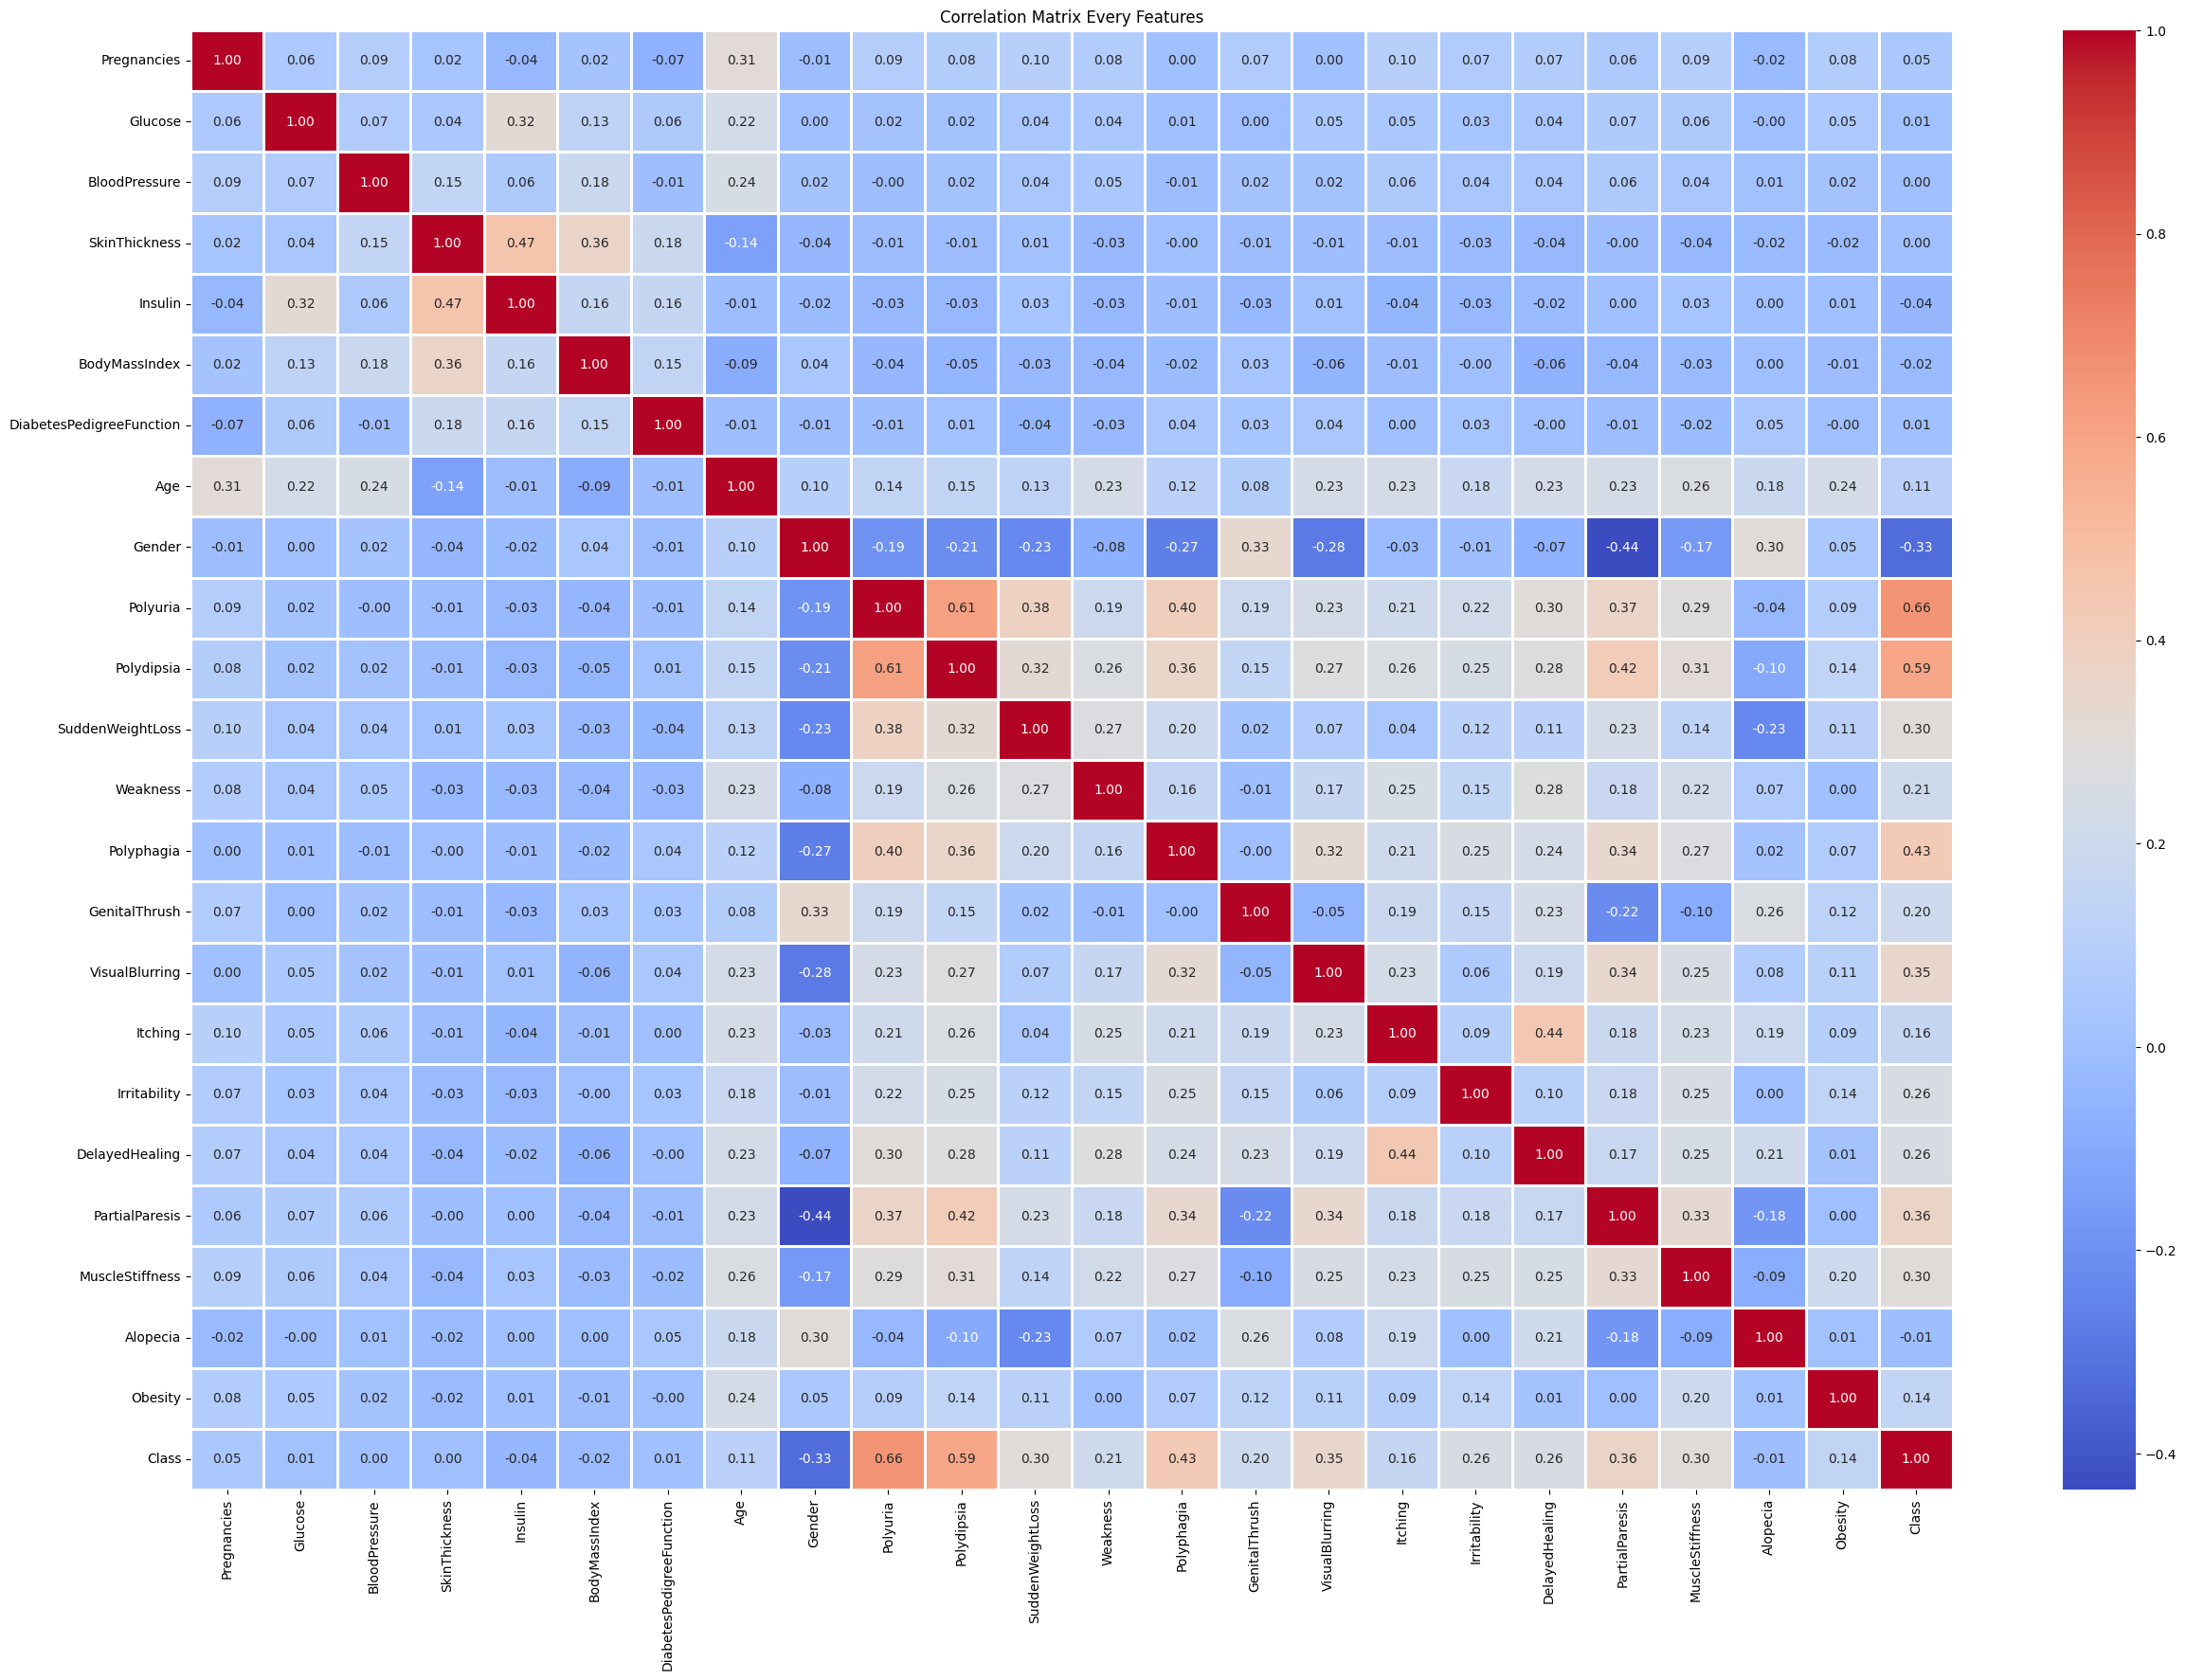

In [77]:
correlation_matrix = df.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title('Correlation Matrix Every Features')
plt.show()

Heat mapping matriks, korelasi berkisar antara -1 dan +1, mengukur kekuatan hubungan antara dua variabel serta arahnya (positif atau negatif). Mengenai kekuatan hubungan antar variabel, semakin dekat nilainya ke 1 atau -1, korelasinya semakin kuat. Sedangkan, semakin dekat nilainya ke 0, korelasinya semakin lemah.

Berdasarkan correlation matrix heatmap, terdapat 2 feature yang memiliki nilai korelasi yang tinggi yakni 0.66 dan 0.59, yakni masing-masing dimiliki oleh feature Polyuria dan Polydipsia.

## Mencari Outlier

Selanjutnya, dilakukan pengechekan outliers pada beberapa features, jika terdapat outlier, maka akan dilakukan penanggulangan outliers dengan melakukan proses metode IQR.

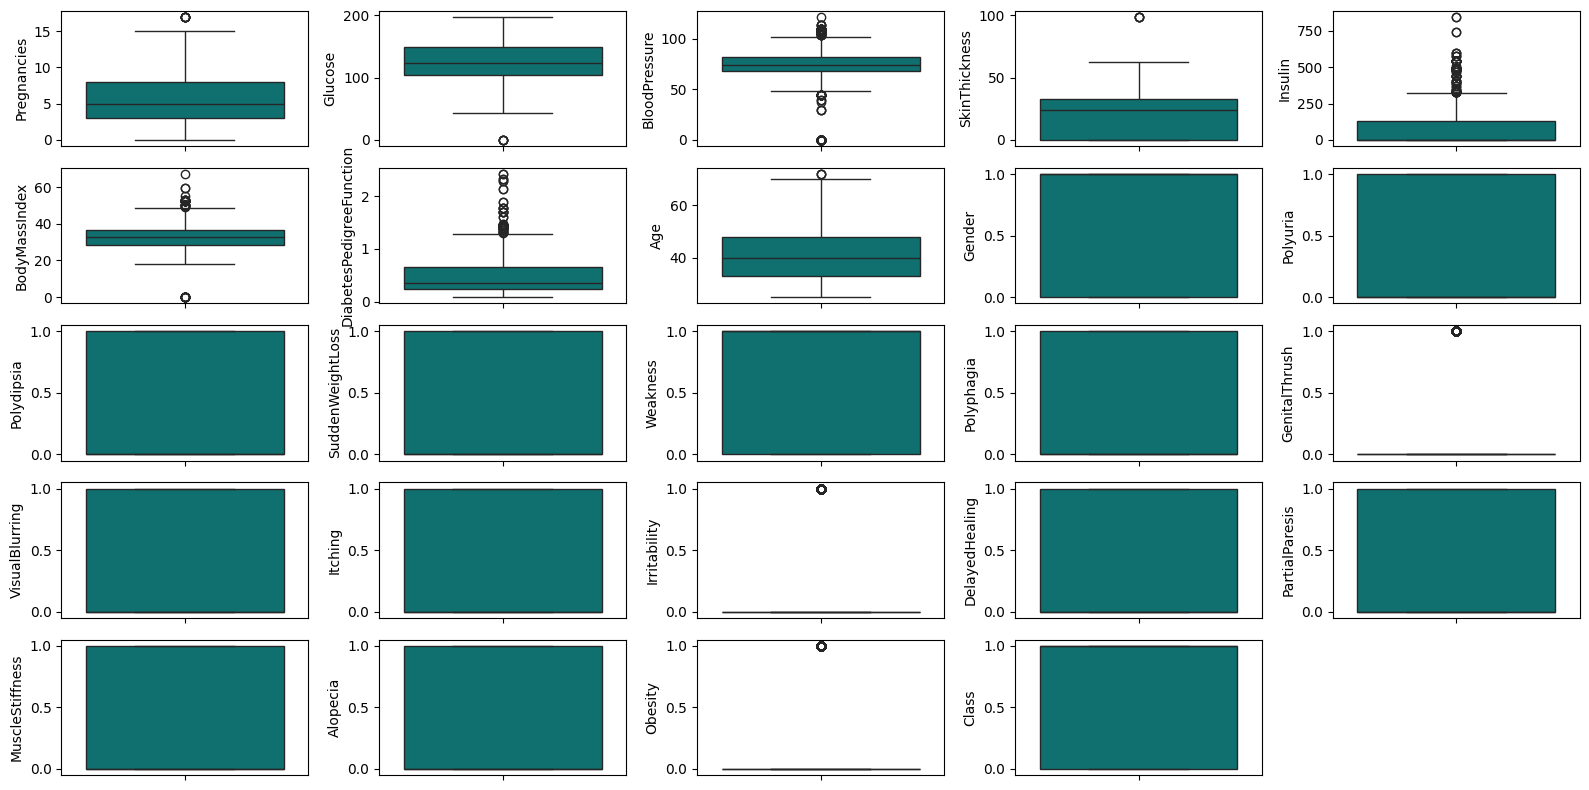

In [78]:
plt.figure(figsize=(16, 8))
num_rows = (len(data_num) + 4) // 5

for i in range(0, len(data_num)):
    plt.subplot(num_rows, 5, i + 1)
    sns.boxplot(y=df[data_num[i]], color='teal', orient='v')
    plt.tight_layout()

In [79]:
# Menghitung batas bawah dan batas atas untuk mendeteksi outlier menggunakan IQR
def calculate_iqr_limits(data, column_name):
    Q1 = data[column_name].quantile(0.25)  # Kuartil pertama
    Q3 = data[column_name].quantile(0.75)  # Kuartil ketiga
    IQR = Q3 - Q1  # Rentang antar-kuartil
    low_limit = Q1 - 1.5 * IQR  # Batas bawah
    high_limit = Q3 + 1.5 * IQR  # Batas atas
    return low_limit, high_limit

# Contoh penerapan untuk setiap kolom
columns = ['Insulin', 'DiabetesPedigreeFunction', 'BodyMassIndex', 'BloodPressure']

for col in columns:
    low, high = calculate_iqr_limits(df, col)
    print(f"Batas untuk {col}:")
    print(f"Low limit: {low}")
    print(f"High limit: {high}\n")


Batas untuk Insulin:
Low limit: -195.0
High limit: 325.0

Batas untuk DiabetesPedigreeFunction:
Low limit: -0.39250000000000007
High limit: 1.2915

Batas untuk BodyMassIndex:
Low limit: 15.85
High limit: 49.050000000000004

Batas untuk BloodPressure:
Low limit: 47.0
High limit: 103.0



Berdasarkan analisis, keempat kolom berikut menunjukkan nilai batas yang telah dihitung menggunakan metode IQR:
*   Insulin: Low limit = -195.0, High limit = 325.0
*   DiabetesPedigreeFunction: Low limit = -0.3925, High limit = 1.2915
*   BodyMassIndex: Low limit = 15.85, High limit = 49.05
*   BloodPressure: Low limit = 47.0, High limit = 103.0

Namun, hasil evaluasi menunjukkan bahwa keempat kolom ini memiliki korelasi yang sangat kecil dengan outcome diabetes. Oleh karena itu, tidak diperlukan tindakan lebih lanjut seperti penyesuaian atau transformasi terhadap data ini, karena keberadaannya tidak memberikan pengaruh signifikan terhadap model prediksi.

# Data Prep & Modelling

Digunakan 5 jenis model, yaitu Random Forest, XGBoost, SVC, Decision Tree, dan KNN. Nantinya, akan dipilih salah satu model yang akurasi tertinggi.

In [80]:
X = df.drop(["Class"], axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [81]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [82]:
result = pd.DataFrame(index=['train_mse', 'test_mse','eval_train','eval_test'],
                      columns=['SVC', 'RandomForest', 'DecisionTree', 'KNN', 'XGBoost'])

## Random Forest

In [83]:
rf = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

result.loc['train_mse', 'RandomForest'] = mean_squared_error(y_train, rf.predict(X_train))
result.loc['test_mse', 'RandomForest'] = mean_squared_error(y_test, rf.predict(X_test))

y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       163
           1       0.98      0.95      0.96       317

    accuracy                           0.95       480
   macro avg       0.94      0.95      0.95       480
weighted avg       0.96      0.95      0.95       480



## XGBoost

In [84]:
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1)

xgb.fit(X_train, y_train)

result.loc['train_mse', 'XGBoost'] = mean_squared_error(y_train, xgb.predict(X_train))
result.loc['test_mse', 'XGBoost'] = mean_squared_error(y_test, xgb.predict(X_test))

y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

print("Training Accuracy of XGBoost:", xgb.score(X_train, y_train))
print("Testing Accuracy of XGBoost:", xgb.score(X_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       317

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

Training Accuracy of XGBoost: 1.0
Testing Accuracy of XGBoost: 1.0


## Decision Tree

In [85]:
dt = DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)
dt.fit(X_train, y_train)

result.loc['train_mse', 'DecisionTree'] = mean_squared_error(y_train, dt.predict(X_train))
result.loc['test_mse', 'DecisionTree'] = mean_squared_error(y_test, dt.predict(X_test))

y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       163
           1       0.95      0.95      0.95       317

    accuracy                           0.93       480
   macro avg       0.93      0.92      0.93       480
weighted avg       0.93      0.93      0.93       480



## KNN

In [86]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

result.loc['train_mse', 'KNN'] = mean_squared_error(y_train, knn.predict(X_train))
result.loc['test_mse', 'KNN'] = mean_squared_error(y_test, knn.predict(X_test))

y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.41      0.30      0.35       163
           1       0.68      0.78      0.73       317

    accuracy                           0.62       480
   macro avg       0.55      0.54      0.54       480
weighted avg       0.59      0.62      0.60       480



## SVC

In [87]:
svc = SVC()
svc.fit(X_train, y_train)

result.loc['train_mse', 'SVC'] = mean_squared_error(y_train, svc.predict(X_train))
result.loc['test_mse', 'SVC'] = mean_squared_error(y_test, svc.predict(X_test))

y_pred_svc = svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       163
           1       0.66      1.00      0.80       317

    accuracy                           0.66       480
   macro avg       0.33      0.50      0.40       480
weighted avg       0.44      0.66      0.53       480



In [88]:
print(result)

                 SVC RandomForest DecisionTree       KNN XGBoost
train_mse   0.348279     0.040146     0.069864  0.235662     0.0
test_mse    0.339583     0.045833     0.066667  0.383333     0.0
eval_train       NaN          NaN          NaN       NaN     NaN
eval_test        NaN          NaN          NaN       NaN     NaN


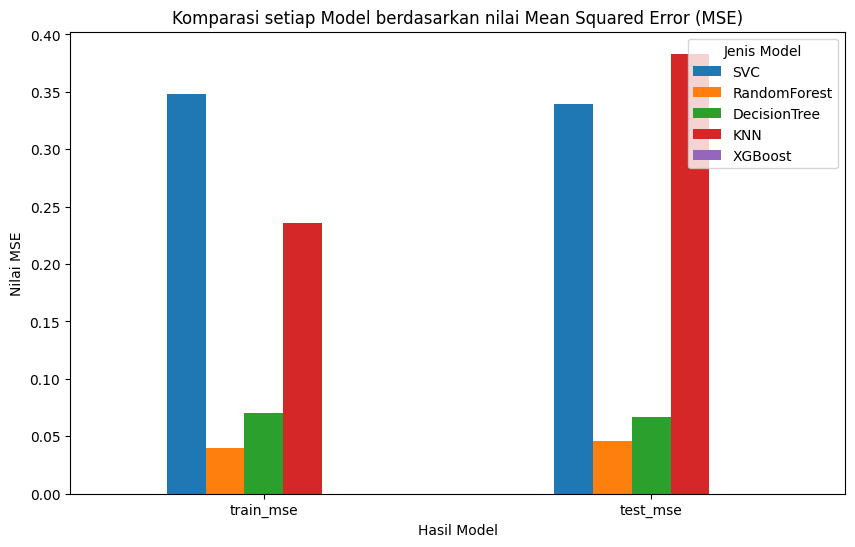

In [89]:
result.loc[['train_mse', 'test_mse'], :].plot(kind='bar', figsize=(10, 6))
plt.title('Komparasi setiap Model berdasarkan nilai Mean Squared Error (MSE)')
plt.xlabel('Hasil Model')
plt.ylabel('Nilai MSE')
plt.xticks(rotation=0)
plt.legend(title='Jenis Model', loc='upper right')
plt.show()

# Evaluation

Setelah dilakukannya pemodelan pada tahapan **"Data Prep & Modelling"**, selanjutnya dilakukan evaluation terhadap model yang telah dibuat dengan pengaturan hyperparameter mengguakan GridSearchCV. Hal ini dilakukan dikarenakan untuk mendapatkan model terbaik dengan pengaturan hyperparameter paling optimal sehingga didapatkan model yang paling akurat dalam memprediksi Diagnosis Diabetes.

### Model Evaluation dengan Random Forest Classifier

In [90]:
rf_eval = RandomForestClassifier()
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}

grid_search_rf = GridSearchCV(rf_eval, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

result.loc['eval_train', 'RandomForest'] = mean_squared_error(y_train, grid_search_rf.predict(X_train))
result.loc['eval_test', 'RandomForest'] = mean_squared_error(y_test, grid_search_rf.predict(X_test))

y_pred_rf_eval = grid_search_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf_eval))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       163
           1       1.00      1.00      1.00       317

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



### Model Evaluation dengan XGBoost Classifier

In [91]:
xgb_eval = XGBClassifier()
param_grid_xgb = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}

grid_search_xgb = GridSearchCV(xgb_eval, param_grid_xgb, cv=5,  scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)

result.loc['eval_train', 'XGBoost'] = mean_squared_error(y_train, grid_search_xgb.predict(X_train))
result.loc['eval_test', 'XGBoost'] = mean_squared_error(y_test, grid_search_xgb.predict(X_test))

y_pred_xgb_eval = grid_search_xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb_eval))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       317

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



### Model Evaluation dengan Decision Tree Classifier

In [92]:
dt_eval = DecisionTreeClassifier()
param_grid_dt = {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}

grid_search_dt = GridSearchCV(dt_eval, param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, y_train)

result.loc['eval_train', 'DecisionTree'] = mean_squared_error(y_train, grid_search_dt.predict(X_train))
result.loc['eval_test', 'DecisionTree'] = mean_squared_error(y_test, grid_search_dt.predict(X_test))

y_pred_dt_eval = grid_search_dt.predict(X_test)
print(classification_report(y_test, y_pred_dt_eval))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       163
           1       0.99      0.99      0.99       317

    accuracy                           0.98       480
   macro avg       0.98      0.98      0.98       480
weighted avg       0.98      0.98      0.98       480



### Model Evaluation dengan KNN Classifier

In [93]:
knn_eval = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

grid_search_knn = GridSearchCV(knn_eval, param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train, y_train)

result.loc['eval_train', 'KNN'] = mean_squared_error(y_train, grid_search_knn.predict(X_train))
result.loc['eval_test', 'KNN'] = mean_squared_error(y_test, grid_search_knn.predict(X_test))

y_pred_knn_eval = grid_search_knn.predict(X_test)
print(classification_report(y_test, y_pred_knn_eval))

              precision    recall  f1-score   support

           0       0.43      0.25      0.32       163
           1       0.68      0.83      0.75       317

    accuracy                           0.63       480
   macro avg       0.56      0.54      0.53       480
weighted avg       0.60      0.63      0.60       480



### Model Evaluation dengan Support Vector Classifier (SVC)

In [94]:
svc_eval = SVC()
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

grid_search_svc = GridSearchCV(svc_eval, param_grid_svc, cv=5, scoring='neg_mean_squared_error')
grid_search_svc.fit(X_train, y_train)

result.loc['eval_train', 'SVC'] = mean_squared_error(y_train, grid_search_svc.predict(X_train))
result.loc['eval_test', 'SVC'] = mean_squared_error(y_test, grid_search_svc.predict(X_test))

y_pred_svc_eval = grid_search_svc.predict(X_test)
print(classification_report(y_test, y_pred_svc_eval))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       163
           1       0.94      0.92      0.93       317

    accuracy                           0.91       480
   macro avg       0.89      0.90      0.90       480
weighted avg       0.91      0.91      0.91       480



In [95]:
print(result)

                 SVC RandomForest DecisionTree       KNN XGBoost
train_mse   0.348279     0.040146     0.069864  0.235662     0.0
test_mse    0.339583     0.045833     0.066667  0.383333     0.0
eval_train  0.089155          0.0          0.0  0.273723     0.0
eval_test    0.09375     0.002083     0.016667  0.366667     0.0


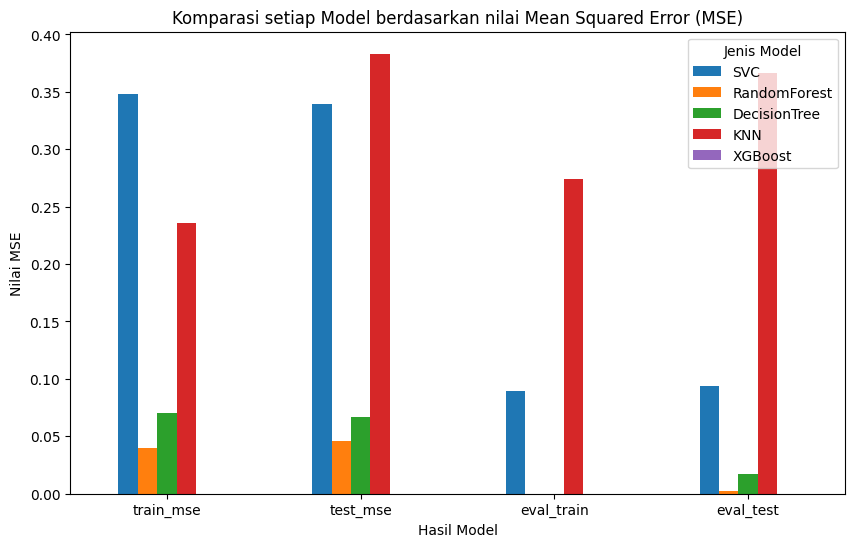

In [96]:
result.loc[['train_mse', 'test_mse', 'eval_train', 'eval_test'], :].plot(kind='bar', figsize=(10, 6))
plt.title('Komparasi setiap Model berdasarkan nilai Mean Squared Error (MSE)')
plt.xlabel('Hasil Model')
plt.ylabel('Nilai MSE')
plt.xticks(rotation=0)
plt.legend(title='Jenis Model', loc='upper right')
plt.show()

Berdasarkan hasil modelling, didapatkan bahwa model XGBoost merupakan model terbaik untuk digunakan pada dataset, sehingga pada perancangan prototype, digunakan model XGBoost.

## Testing Data

Dengan membuat data imitasi yang mengikuti beberapa feature pada data, sehingga proses ini diibaratkan bila adanya pasien baru dengan beberapa data yang sesuai dengan data, apakah model dapat memprediksi pasien mengindikasi diabetes atau tidak.

In [97]:
testing_data = {'Pregnancies': [6],
                'Glucose': [148],
                'BloodPressure': [72],
                'SkinThickness': [35],
                'Insulin': [0],
                'BodyMassIndex': [33.2],
                'DiabetesPedigreeFunction': [0.627],'Age': [39],
                'Gender': [1],
                'Polyuria': [1],
                'Polydipsia': [1],
                'SuddenWeightLoss': [0],
                'Weakness': [1],
                'Polyphagia': [0],
                'GenitalThrush': [0],
                'VisualBlurring': [1],
                'Itching': [1],
                'Irritability': [0],
                'DelayedHealing': [0],
                'PartialParesis': [1],
                'MuscleStiffness': [0],
                'Alopecia': [1],
                'Obesity': [1]
                }

testing_data = pd.DataFrame(testing_data)
testing_data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Gender,Polyuria,...,Polyphagia,GenitalThrush,VisualBlurring,Itching,Irritability,DelayedHealing,PartialParesis,MuscleStiffness,Alopecia,Obesity
0,6,148,72,35,0,33.2,0.627,39,1,1,...,0,0,1,1,0,0,1,0,1,1


### Testing RF

In [98]:
predict_data_baru_RF = rf.predict(testing_data)
print("Hasil Prediksi Data Testing - Model Random Forest")
print(predict_data_baru_RF)

Hasil Prediksi Data Testing - Model Random Forest
[1]


### Testing XGB

In [99]:
predict_data_baru_xgb = xgb.predict(testing_data)
print("Hasil Prediksi Data Testing - Model XGBoost")
print(predict_data_baru_RF)

Hasil Prediksi Data Testing - Model XGBoost
[1]


### Testing SVC

In [100]:
predict_data_baru_svc = svc.predict(testing_data)
print("Hasil Prediksi Data Testing - Model SVC")
print(predict_data_baru_svc)

Hasil Prediksi Data Testing - Model SVC
[1]


### Testing Decision Tree

In [101]:
predict_data_baru_dt = dt.predict(testing_data)
print("Hasil Prediksi Data Testing - Model Decision Tree")
print(predict_data_baru_dt)

Hasil Prediksi Data Testing - Model Decision Tree
[1]


### Testing KNN

In [102]:
predict_data_baru_knn = knn.predict(testing_data)
print("Hasil Prediksi Data Testing - Model KNN")
print(predict_data_baru_knn)

Hasil Prediksi Data Testing - Model KNN
[1]


## Import Pickle

File .sav nantinya akan digunakan pada streamlit (sebagai prototype).

In [103]:
import pickle

with open('xgb_model.sav', 'wb') as file:
    pickle.dump(xgb,file)

In [104]:
import pickle

with open('rf_model.sav', 'wb') as file:
    pickle.dump(rf,file)

In [105]:
import pickle

with open('knn_model.sav', 'wb') as file:
    pickle.dump(knn,file)

In [106]:
import pickle

with open('dt_model.sav', 'wb') as file:
    pickle.dump(dt,file)

In [107]:
import pickle

with open('svc_model.sav', 'wb') as file:
    pickle.dump(svc,file)